<div style="display:fill;
            border-radius:15px;
            background-color:#eac086;
            font-size:210%;
            font-family:sans-serif;
            letter-spacing:0.5px;
            padding:10px;
            color:white;
            border-style: solid;
            border-color: black;
            text-align:center;">
<b>
    "BodyFat percentage prediction"

![image.png](first.png)

# <b>1 <span style='color:gray'>|</span> Importing Libraries and Loading dataset</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
plt.style.use('fivethirtyeight')
colors=['#ffcd94','#eac086','#ffad60','#ffe39f']
sns.set_palette(sns.color_palette(colors))

In [2]:
df = pd.read_csv("bodyfat.csv")
df = df.drop(columns=['Density','Chest','Hip'], axis=1)
df.head()

,BodyFat,Age,Weight,Height,Neck,Abdomen,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23,154.25,67.75,36.2,85.2,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22,173.25,72.25,38.5,83.0,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22,154.00,66.25,34.0,87.9,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26,184.75,72.25,37.4,86.4,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24,184.25,71.25,34.4,100.0,63.2,42.2,24.0,32.2,27.7,17.7


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#eac086;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | About the dataset</b></p>
</div>

### Context
**Lists estimates of the percentage of body fat determined by underwater
weighing and various body circumference measurements for 252 men.**

### Educational use of the dataset
**This data set can be used to illustrate multiple regression techniques. Accurate measurement of body fat is inconvenient/costly and it is desirable to have easy methods of estimating body fat that are not inconvenient/costly.**

### Content
The variables listed below, from left to right, are:

* Density determined from underwater weighing
* Percent body fat from Siri's (1956) equation
* Age (years)
* Weight (lbs)
* Height (inches)
* Neck circumference (cm)
* Chest circumference (cm)
* Abdomen 2 circumference (cm)
* Hip circumference (cm)
* Thigh circumference (cm)
* Knee circumference (cm)
* Ankle circumference (cm)
* Biceps (extended) circumference (cm)
* Forearm circumference (cm)
* Wrist circumference (cm)

(Measurement standards are apparently those listed in Benhke and Wilmore (1974), pp. 45-48 where, for instance, the abdomen 2 circumference is measured "laterally, at the level of the iliac crests, and anteriorly, at the umbilicus".)

These data are used to produce the predictive equations for lean body weight given in the abstract "Generalized body composition prediction equation for men using simple measurement techniques", K.W. Penrose, A.G. Nelson, A.G. Fisher, FACSM, Human Performance Research Center, Brigham Young University, Provo, Utah 84602 as listed in Medicine and Science in Sports and Exercise, vol. 17, no. 2, April 1985, p. 189. (The predictive equation were obtained from the first 143 of the 252 cases that are listed below).

# <b>2 <span style='color:#eac086'>|</span> Understanding Our Data</b>

In [3]:
# What is the shape of the dataset?
df.shape

(259, 12)

In [4]:
#Some info about our attributes and its datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BodyFat  259 non-null    float64
 1   Age      259 non-null    int64  
 2   Weight   259 non-null    float64
 3   Height   259 non-null    float64
 4   Neck     256 non-null    float64
 5   Abdomen  257 non-null    float64
 6   Thigh    259 non-null    float64
 7   Knee     259 non-null    float64
 8   Ankle    258 non-null    float64
 9   Biceps   259 non-null    float64
 10  Forearm  258 non-null    float64
 11  Wrist    259 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 24.4 KB


In [5]:
#Some analysis on the numerical columns
df.describe()

,BodyFat,Age,Weight,Height,Neck,Abdomen,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,259.000000,259.000000,259.000000,259.000000,256.000000,257.000000,259.000000,259.000000,258.000000,259.000000,258.000000,259.000000
mean,19.391120,44.911197,179.522664,70.069498,38.006250,92.817899,59.316216,38.651351,23.118992,32.280695,28.685271,18.286486
std,8.394477,12.594904,29.320577,3.708948,2.439053,10.852195,5.325117,2.411252,1.685804,3.010385,2.003814,0.997716
min,0.000000,22.000000,118.500000,29.500000,31.100000,69.400000,46.000000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,12.700000,35.500000,159.500000,68.250000,36.400000,85.200000,56.000000,37.100000,22.000000,30.250000,27.300000,17.600000
50%,19.500000,43.000000,177.000000,70.000000,38.000000,91.500000,58.900000,38.600000,22.800000,32.000000,28.800000,18.300000
75%,25.450000,54.000000,198.115000,72.250000,39.500000,99.800000,62.400000,40.000000,24.000000,34.350000,30.000000,18.800000
max,47.500000,81.000000,363.150000,77.750000,51.200000,148.100000,87.300000,49.100000,33.900000,45.000000,34.900000,21.700000


In [6]:
#Check for null values
df.isnull().sum()

BodyFat    0
Age        0
Weight     0
Height     0
Neck       3
Abdomen    2
Thigh      0
Knee       0
Ankle      1
Biceps     0
Forearm    1
Wrist      0
dtype: int64

**We have some of the features that has the missing values**

so we will be using SimpleImputer to fill the missing value using the mean strategy!!!

In [7]:
numerical_cols = df.select_dtypes(include=['float64','int64'])
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='mean')
data = impute.fit_transform(numerical_cols)
numeric_df = pd.DataFrame(data, columns=numerical_cols.columns)
numeric_df.head()

,BodyFat,Age,Weight,Height,Neck,Abdomen,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.3,23.0,154.25,67.75,36.2,85.2,59.0,37.3,21.9,32.0,27.4,17.1
1,6.1,22.0,173.25,72.25,38.5,83.0,58.7,37.3,23.4,30.5,28.9,18.2
2,25.3,22.0,154.00,66.25,34.0,87.9,59.6,38.9,24.0,28.8,25.2,16.6
3,10.4,26.0,184.75,72.25,37.4,86.4,60.1,37.3,22.8,32.4,29.4,18.2
4,28.7,24.0,184.25,71.25,34.4,100.0,63.2,42.2,24.0,32.2,27.7,17.7


In [8]:
# numeric_df = df
# numeric_df['Neck']=numeric_df['Neck'].fillna(numeric_df.groupby(['BodyFat'])['Neck'].transform('mean'))
# numeric_df['Abdomen']=numeric_df['Abdomen'].fillna(numeric_df.groupby(['BodyFat'])['Abdomen'].transform('mean'))
# numeric_df['Ankle']=numeric_df['Ankle'].fillna(numeric_df.groupby(['BodyFat'])['Ankle'].transform('mean'))
# numeric_df['Forearm']=numeric_df['Forearm'].fillna(numeric_df.groupby(['BodyFat'])['Forearm'].transform('mean'))

In [9]:
# bf, age, wt, ht, n, ab, th, kn, ank, bi, fr, wr = [],[],[],[],[],[],[],[],[],[],[],[]

# for i in range(500):
#     bf.append(np.random.uniform(1.4, 47.5))
#     age.append(np.random.randint(22, 81))
#     wt.append(np.random.uniform(118.5, 363.15))
#     ht.append(np.random.uniform(29.5, 77.75))
#     n.append(np.random.uniform(31.1, 51.2))
#     ab.append(np.random.uniform(69.4, 148.1))
#     th.append(np.random.uniform(46.0, 87.3))
#     kn.append(np.random.uniform(33.0, 49.1))
#     ank.append(np.random.uniform(19.1, 33.9))
#     bi.append(np.random.uniform(24.8, 45.0))
#     fr.append(np.random.uniform(21.0, 34.9))
#     wr.append(np.random.uniform(15.8, 21.7))

In [10]:
# newdf = pd.DataFrame({"BodyFat":bf, "Age":age, "Weight":wt, "Height":ht, "Neck":n, "Abdomen":ab, "Thigh":th, "Knee":kn, 
# "Ankle":ank, "Biceps":bi, "Forearm":fr, "Wrist":wr})
# newdf.shape

In [11]:
# numeric_df = pd.concat([numeric_df, newdf], axis=0)
# numeric_df.shape

In [12]:
numeric_df = numeric_df.dropna()
numeric_df.isna().sum()

BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Abdomen    0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

**Great we have no null values in the dataset now !**

In [13]:
#Check for duplicates in the dataset
numeric_df.duplicated().sum()

0

**Great we have no duplicate values in the dataset!**


# <b>3 <span style='color:#eac086'>|</span> Exploratory Data Analysis</b>


Text(0.5, 0.98, 'Visualizing Continuous Columns')

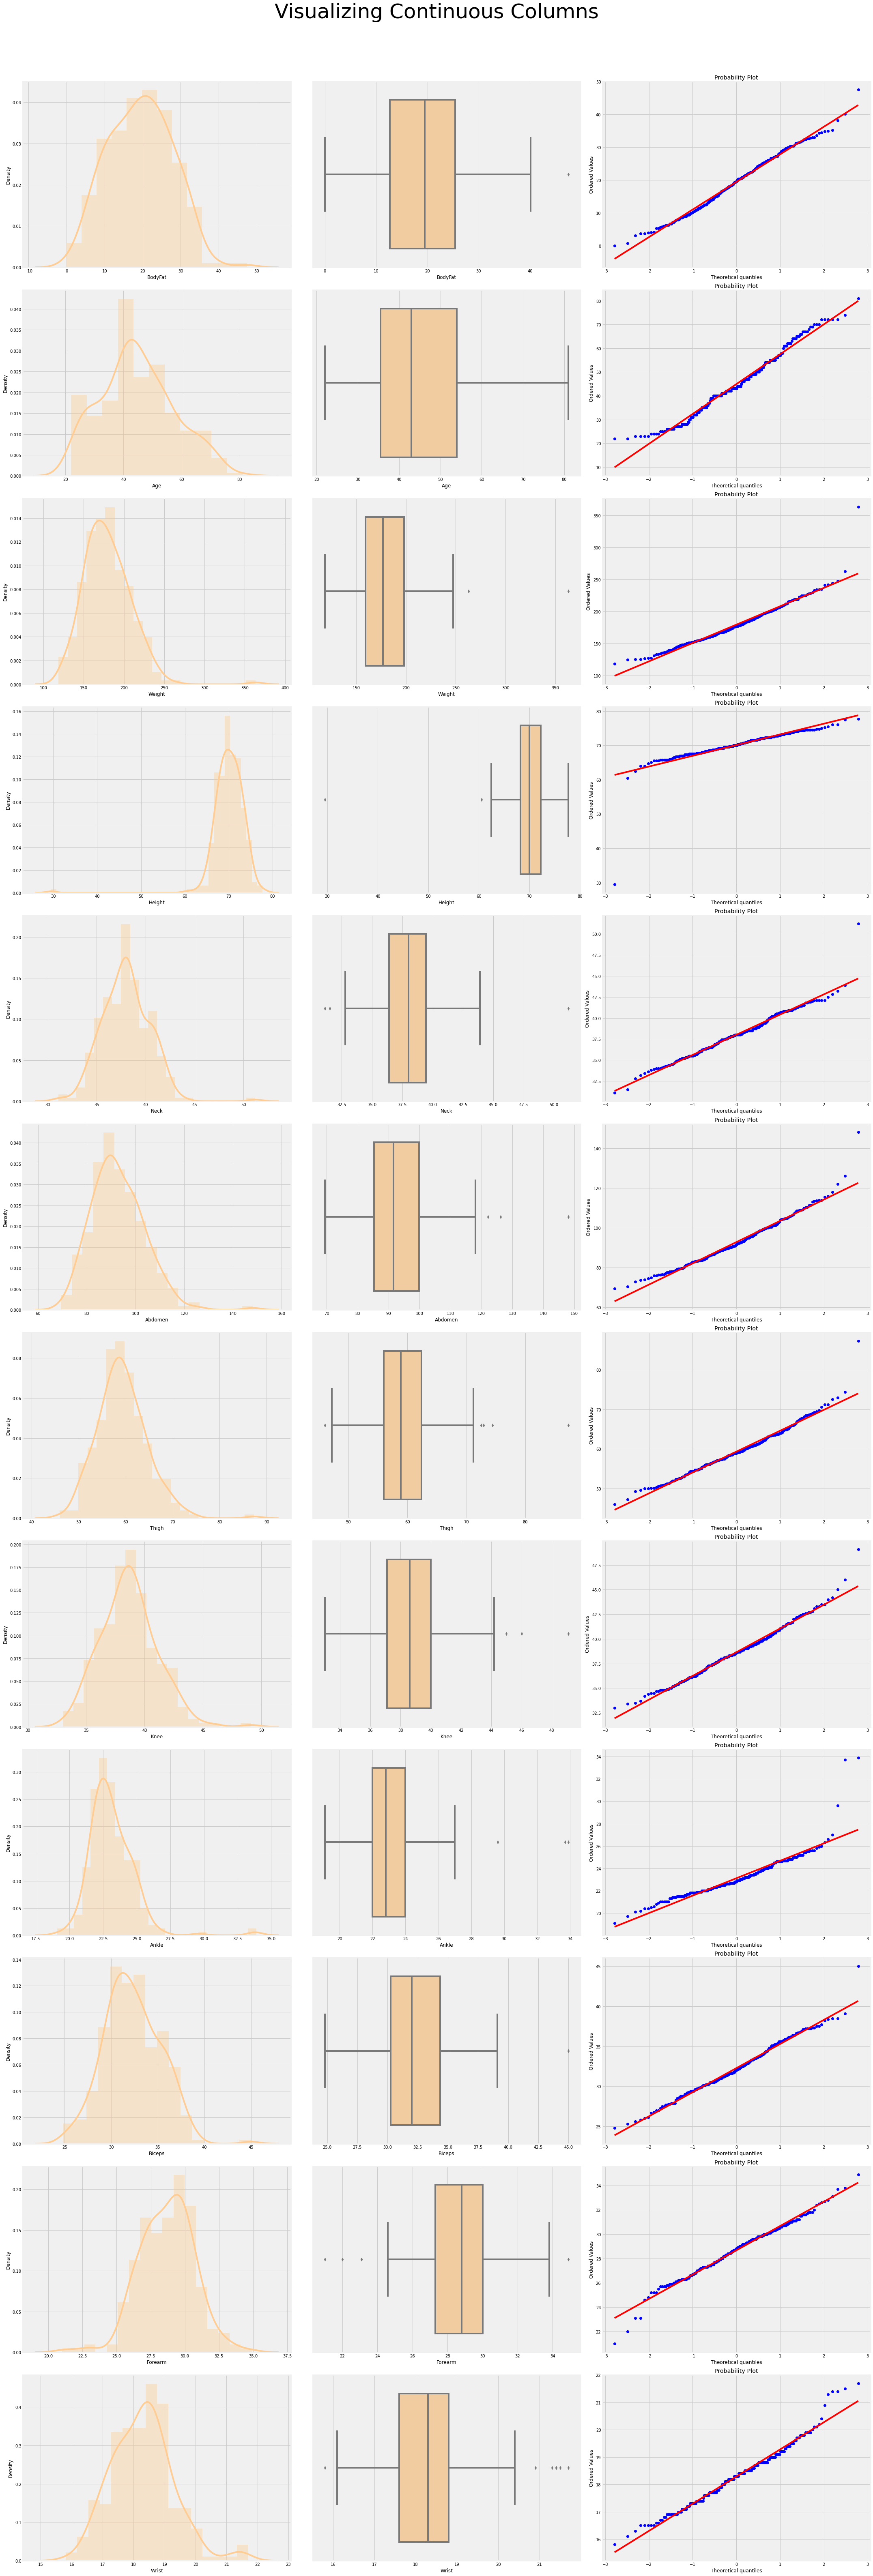

In [14]:
import warnings
import statsmodels.api as sm
import scipy.stats as stats
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(12,3,figsize=(30,90))
for index,i in enumerate(numeric_df.columns):
    sns.distplot(numeric_df[i],ax=ax[index,0])
    sns.boxplot(numeric_df[i],ax=ax[index,1])
    stats.probplot(numeric_df[i],plot=ax[index,2])
    
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing Continuous Columns",fontsize=50)

### Observations
> * The dataset has some outliers.
> * Some columns such as - Height,Ankle,Age etc are skewed

In [15]:
print(f'-------Column Skewness------\n{numeric_df.skew(axis=0).sort_values()}')

-------Column Skewness------
Height    -5.090349
Forearm   -0.246725
BodyFat    0.097598
Biceps     0.285656
Age        0.294814
Knee       0.458252
Wrist      0.507184
Neck       0.528964
Thigh      0.743577
Abdomen    0.782960
Weight     1.152432
Ankle      2.228022
dtype: float64


**We see Ankle , Hip , Weight,Height are the most skewed columns**

<AxesSubplot:>

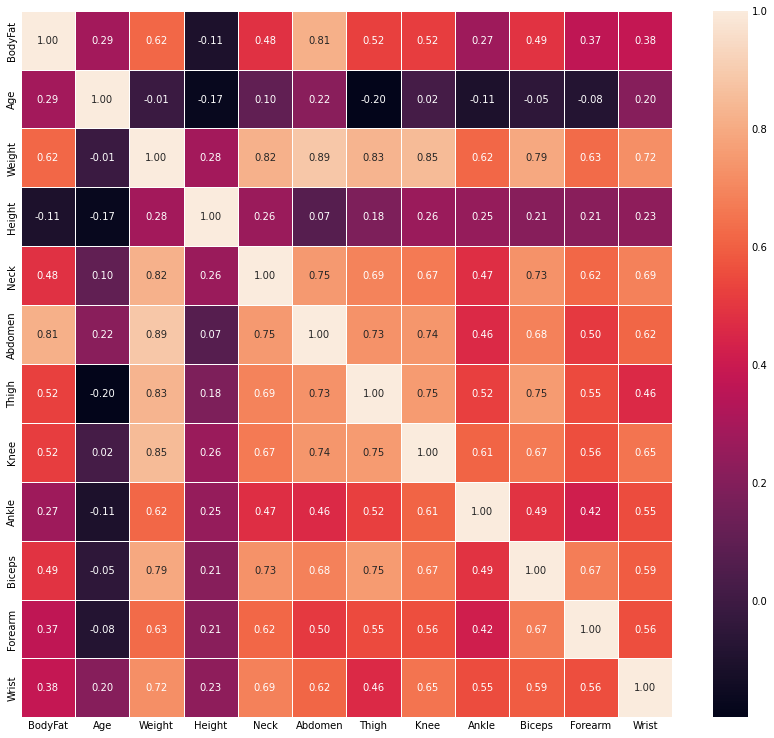

In [16]:
plt.figure(figsize=(13,13))
sns.heatmap(numeric_df.corr(),annot=True,linewidth=0.5,fmt="0.2f")

### Observations
> Multicollinearity is present in the data

# <b>4 <span style='color:#eac086'>|</span> Feature Engineering and Preprocessing</b>

#### Here we are removing three columns namely - 
> * Density
> * Chest
> * Hip

Since they had high collinearity. 
This will help us reduce some of the problems caused due to multicollinearity

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#eac086;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
            <p style="padding: 8px;color:white;">
        <b>👉 | Removing Outliers Using Robust Scaler</b></p>
</div>

In [17]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# numeric = scaler.fit_transform(numeric_df)

In [18]:
# robust_df = pd.DataFrame(numeric, columns = numeric_df.columns)
# robust_df.head()

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#eac086;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Separating Independent and Dependent Variables</b></p>
</div>

In [19]:
feature = numeric_df.drop(columns=['BodyFat'], axis=1)
target = numeric_df[["BodyFat"]]

In [20]:
# X = robust_df.drop(columns=['BodyFat','Density'], axis=1)
# y = robust_df[['BodyFat']]

In [21]:
X = numeric_df.drop(columns=['BodyFat'], axis=1)
y = numeric_df.BodyFat
X.shape

(259, 11)

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit_transform(X)

features = pd.DataFrame(data, columns=X.columns)
features.head()

,Age,Weight,Height,Neck,Abdomen,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,-1.743056,-0.863612,-0.626590,-0.746339,-0.706070,-0.059497,-0.561521,-0.725901,-0.093423,-0.643904,-1.191505
1,-1.822607,-0.214348,0.589041,0.204017,-0.909978,-0.115943,-0.561521,0.167338,-0.592663,0.107576,-0.086852
2,-1.822607,-0.872155,-1.031800,-1.655376,-0.455818,0.053395,0.103320,0.524634,-1.158468,-1.746074,-1.693620
3,-1.504403,0.178627,0.589041,-0.250501,-0.594847,0.147471,-0.561521,-0.189958,0.039708,0.358069,-0.086852
4,-1.663505,0.161541,0.318901,-1.490096,0.665677,0.730745,1.474553,0.524634,-0.026857,-0.493608,-0.588967


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#eac086;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Splitting into train and test set</b></p>
</div>

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, y, random_state=42)

In [24]:
x_train.columns

Index(['Age', 'Weight', 'Height', 'Neck', 'Abdomen', 'Thigh', 'Knee', 'Ankle',
       'Biceps', 'Forearm', 'Wrist'],
      dtype='object')

In [25]:
y_train

245    15.2
97     11.3
164    27.3
86     14.9
246    30.2
       ... 
20     19.1
188    20.5
71      8.8
106    19.3
102    20.1
Name: BodyFat, Length: 194, dtype: float64

In [26]:
x_test.shape

(65, 11)

In [27]:
x_train.head()

,Age,Weight,Height,Neck,Abdomen,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
245,1.836735,-0.820897,-0.221379,-0.705020,-0.789487,-0.943816,-0.478416,-0.309056,-1.025337,-0.694002,0.214417
97,0.404819,-0.581695,-0.964265,0.286656,-0.567041,0.523777,0.269530,0.107789,-0.559380,-0.443509,-0.086852
164,-0.867996,1.340468,0.521506,0.617215,1.221791,0.843637,1.391448,0.167338,0.572230,1.259845,0.214417
86,2.154939,-0.744011,-0.761660,-0.126542,-0.437281,-0.398172,-0.395311,-0.785450,0.106273,-0.343312,0.515686
246,1.916286,1.229409,0.116296,1.154373,1.370088,0.749560,2.222499,-0.309056,1.737124,1.961226,0.515686


In [28]:
# trans = PowerTransformer()
# X_train = trans.fit_transform(X_train)
# X_test = trans.transform(X_test)

In [29]:
# X_train = pd.DataFrame(X_train, columns=X.columns)

In [30]:
x_train.head()

,Age,Weight,Height,Neck,Abdomen,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
245,1.836735,-0.820897,-0.221379,-0.705020,-0.789487,-0.943816,-0.478416,-0.309056,-1.025337,-0.694002,0.214417
97,0.404819,-0.581695,-0.964265,0.286656,-0.567041,0.523777,0.269530,0.107789,-0.559380,-0.443509,-0.086852
164,-0.867996,1.340468,0.521506,0.617215,1.221791,0.843637,1.391448,0.167338,0.572230,1.259845,0.214417
86,2.154939,-0.744011,-0.761660,-0.126542,-0.437281,-0.398172,-0.395311,-0.785450,0.106273,-0.343312,0.515686
246,1.916286,1.229409,0.116296,1.154373,1.370088,0.749560,2.222499,-0.309056,1.737124,1.961226,0.515686


# <b>5 <span style='color:#eac086'>|</span> Model Building</b>


<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#eac086;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Metric Used: R2_score and RMSE</b></p>
</div>

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [32]:
random = RandomForestRegressor()
linear = LinearRegression()
knn_model = KNeighborsRegressor()
svr=SVR()

clf = [linear,svr,random,knn_model]
hashmap={}

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, accuracy_score
def compute(model):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2=r2_score(y_test, y_pred)
    # acc = model.score(x_test, y_test)
    rmse=np.sqrt(mean_squared_error(y_test, y_pred))
    hashmap[str(model)]=(r2, rmse)

In [34]:
for i in clf:
    compute(i)

In [35]:
score=pd.DataFrame(hashmap)
score = score.transpose()
score.columns=["r2_score", 'RMSE']
score = score.sort_values("r2_score", ascending=False)

In [36]:
score

,r2_score,RMSE
LinearRegression(),0.718352,4.203416
RandomForestRegressor(),0.709289,4.270507
KNeighborsRegressor(),0.649095,4.691844
SVR(),0.548984,5.319182


### Observations: 
Linear , Ridge and Bayesian Ridge perform well on the data

Text(0.5, 1.0, 'Actual Vs Predicted')

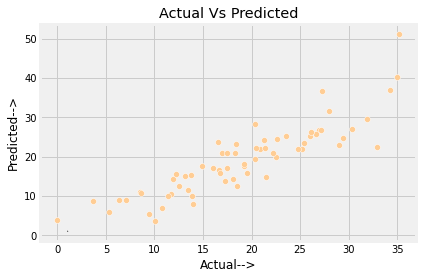

In [37]:
y_pred = linear.predict(x_test)

sns.scatterplot(y_test,y_pred)
plt.plot([1.02, 1.10], [1.02, 1.10], color = 'black',linestyle='--',linewidth=1)
plt.xlabel("Actual-->")
plt.ylabel("Predicted-->")
plt.title("Actual Vs Predicted")

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#eac086;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Predicting Fat Percentage</b></p>
</div>

In [38]:
y_pred = linear.predict(x_test)
y_pred[:10]

array([14.8261772 ,  9.95321833, 10.42885587, 11.52245693, 24.74552242,
       23.59079751, 22.52942997, 20.85964912, 20.83842429, 15.74131806])

In [39]:
y_test[:10]

66     21.5
45     13.9
9      11.7
73     13.5
137    29.4
104    25.4
206    32.9
229    17.0
125    17.5
212    19.5
Name: BodyFat, dtype: float64

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#eac086;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Using pipeline</b></p>
</div>

Creating pre-processing pipeline

In [40]:
from sklearn.preprocessing import RobustScaler, StandardScaler

In [41]:
from sklearn.pipeline import Pipeline

n_transformer = Pipeline(steps=
                        [
                            ('imputeN', SimpleImputer(strategy='mean')),
                            # ("outliers", RobustScaler()),
                            ("se", StandardScaler())
                        ]
                        )

n_transformer

Pipeline(steps=[('imputeN', SimpleImputer()), ('se', StandardScaler())])

In [42]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=
    [
        ("numeric", n_transformer, X.columns)
    ]
)

preprocessing

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputeN', SimpleImputer()),
                                                 ('se', StandardScaler())]),
                                 Index(['Age', 'Weight', 'Height', 'Neck', 'Abdomen', 'Thigh', 'Knee', 'Ankle',
       'Biceps', 'Forearm', 'Wrist'],
      dtype='object'))])

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# create knn model
linear_estimator = LinearRegression()

linear_model = Pipeline(steps=
                     [
                         ("preprocessing", preprocessing),
                         ("estimator", linear_estimator)
                     ])

linear_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('se',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Weight', 'Height', 'Neck', 'Abdomen', 'Thigh', 'Knee', 'Ankle',
       'Biceps', 'Forearm', 'Wrist'],
      dtype='object'))])),
                ('estimator', LinearRegression())])

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn import set_config

# train pipeline model
set_config(display="diagram")
linear_model.fit(X_train, Y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('se',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Weight', 'Height', 'Neck', 'Abdomen', 'Thigh', 'Knee', 'Ankle',
       'Biceps', 'Forearm', 'Wrist'],
      dtype='object'))])),
                ('estimator', LinearRegression())])

In [46]:
np.round(linear_model.score(X_test, Y_test), 3)

0.756

In [47]:
pred = linear_model.predict(X_test)
pred[:10]

array([15.0373956 ,  9.99379189,  9.65657316, 12.0778122 , 24.1561146 ,
       23.00754302, 22.61532132, 21.55655065, 20.97052124, 15.91233459])

In [48]:
pred[:10]

array([15.0373956 ,  9.99379189,  9.65657316, 12.0778122 , 24.1561146 ,
       23.00754302, 22.61532132, 21.55655065, 20.97052124, 15.91233459])

In [49]:
Y_test[:10]

66     21.5
45     13.9
9      11.7
73     13.5
137    29.4
104    25.4
206    32.9
229    17.0
125    17.5
212    19.5
Name: BodyFat, dtype: float64

<div style="color:white;
            display:fill;
            border-radius:8px;
            background-color:#eac086;
            font-size:120%;
            font-family:sans-serif;
            letter-spacing:0.5px">
    <p style="padding: 8px;color:white;"><b>👉 | Saving Model</b></p>
</div>

In [50]:
from joblib import dump

dump(linear_model,"./../savedModel/model.joblib")

['./../savedModel/model.joblib']

In [51]:
y_pred = linear_model.predict(x_test[:10])
y_pred[:10]

array([-21.52272612, -22.73367563, -23.97729683, -21.19803396,
       -20.87862573, -21.7929648 , -20.71433685, -21.89901361,
       -20.35058753, -22.87054853])

In [52]:
Y_test[:10]

66     21.5
45     13.9
9      11.7
73     13.5
137    29.4
104    25.4
206    32.9
229    17.0
125    17.5
212    19.5
Name: BodyFat, dtype: float64

# <b>6 <span style='color:#eac086'>|</span> Conclusion</b>
##### I have been working on the project from the past few days. I had tried all sorts of combinations like <mark>PCA , StandardScaling, Normalization, Transformers</mark> etc. Tried out various combinations of variables, Created New Variables ,Deleted some. And have managed to increase the <mark>r2_score from 0.63 appx to 0.73 appx</mark>. Thats a huge jump!
##### I am happy that my hardwork payed off!


**Also to add**: I have checked various works of the people who have worked on this dataset. And to my surprise that have used the **Density attribute** to predict **Body Fat**. I may be wrong but I think it would be beneficial to skip this Density attribute because we can easily use the Siri's Equation to compute this as Measuring Body Density is what makes the process costly.

# <b>7 <span style='color:#eac086'>|</span> Future Aspects</b>
> * Try out hyperparamter tuning of the model.
> * Deploy the model.

In [53]:
#model desting
values=numeric_df[numeric_df['BodyFat']==12.3]
values.dtypes

BodyFat    float64
Age        float64
Weight     float64
Height     float64
Neck       float64
Abdomen    float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object

In [54]:
data=values.iloc[:,1:]
data

,Age,Weight,Height,Neck,Abdomen,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,23.0,154.25,67.75,36.2,85.2,59.0,37.3,21.9,32.0,27.4,17.1


In [55]:
y_pred=linear_model.predict(data)
age=75

In [56]:
if age>=20 and age<=39:
    
    if y_pred[0]>8 and y_pred[0]<19:
        print("Normal BodyFat percent" + " " +str(y_pred[0]))
        
    elif y_pred[0]> 19:
        print("High BodyFat percent"  + " " +str(y_pred[0]))
        
    else:
        print("Low BodyFat percent"  + " " +str(y_pred[0]))
        
elif age>=40 and age<=59:
    
    if y_pred[0]>=11 and y_pred[0]<=21:
        print("Normal BodyFat percent" + " " +str(y_pred[0]))
        
    elif y_pred[0]> 21:
        print("High BodyFat percent "  + " " +str(y_pred[0]))
        
    else:
        print("Low BodyFat percent"  + " " +str(y_pred[0]))
        
else:
    if y_pred[0]>13 and y_pred[0]<24:
        print("Normal BodyFat percent" + " " +str(y_pred[0]))
    elif y_pred[0]> 24:
        print("High BodyFat percent"  + " " +str(y_pred[0]))
    else:
        print("Low BodyFat percent"  + " " +str(y_pred[0]))


Normal BodyFat percent 14.93437691881935


In [57]:
score=linear_model.score(X_test,Y_test)
score

0.7564208608207029